# Name:  Tessa Ayvazoglu
# ID:  8686601 
# Program: CSCN8010-24W-Sec1to2-Foundations of Machine Learning
# LAB4:Polynomial Regression, R-Squared, MAPE

## Recap: 

* In this lab, we will run univariate polynomial regression models, and evaluate them using R-squared, Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE) metrices. The dataset will be Scikit-Learn Diabetes dataset.

* The goal is to build a model that can best predict the risk of diabetes progression, given the body mass index  (BMI) feature in the dataset. This will be used as a screening tool to help physicians with identifying patients at risk.

* The notebook should be divided into sections, each one with its own title. Follow the process and structure of the Machine Learning workflow. 

* Write the notebook as if you are writing it to your peers at work, and specifically to your product manager. This is the person who provided you with the task at hand. They have only high level knowledge about the problem and of the techniques you use. They are the decision maker reviewing your suggested solution (model), so make sure that it is written such that they can correctly and quickly understand and assess your analysis in terms of its steps and conclusions and solution.

** The steps to be taken:

* 1.Get the data (see below).
* 2.Frame the Problem. Notice that only one independent variable (feature) is being used - the BMI. And that the target is the dependent variable of diabetes progression (see above). 
* 3.EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, histograms, and a correlation matrix (1 point).
* 4.Clean the data if needed, and explain your reasoning for your reader (0.5 point)
* 5.Split the dataset to a train (70%), validation (15%) and test (15%) sets (0.5 point)
* 6.Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) (1 point)
* 7.Compare the six models using the training and validation data:
   * 1.Report R-squared, MAPE and MAE. You should have 6 values per model (1 point).
   * 2.Conclusion: Choose the best model and explain your reasoning quantitively. Make it clear, and effective for a product manager to understand. This section includes the takeaway of the notebook.  
       * 1.Run the chosen model on the test set, and report R-Squared, MSE and MAE for it (0.5 point).
       * 2.Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them (0.5 point).
       * 3.Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value (0.5 point).
   * 3.How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function get_feature_names_out() (0.5 point)


## Data:
      * Scikit-Learn provides toy datasets (list). Here we will use the diabetes dataset (description). Make sure to go over      this    description, before start exploring the data.
      * The data can be loaded into a notebook by the code below (see the documentation for the load_diabetes method to learn about  the optional arguments return_X_y, as_frame and scaled. you can add them if needed):
            * from sklearn import datasets
            * datasets.load_diabetes()

1.Get the data (see below).

In [2]:
import pandas as pd

# Provide the path to the dataset
dataset_path = r'C:\Users\Admin\Documents\MLAI\CSCN8010\LAB4F\Data\diabetes.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


2.Frame the Problem. Notice that only one independent variable (feature) is being used - the BMI. And that the target is the dependent variable of diabetes progression (see above). 

1. Problem Type: Regression.
2. Target Variable (Dependent Variable): Diabetes Progression.
3. Independent Variable (Feature): BMI (Body Mass Index).
4. Dataset: The dataset contains information on diabetes, and the goal is to predict diabetes progression based on BMI.
5. Objective: To accurately predict diabetes progression, build a regression model with BMI as the input feature.
6. Evaluation Metric: For your project, based on the dataset's nature, you can select an appropriate regression metric such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared.

3.EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, histograms, and a correlation matrix (1 point).

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

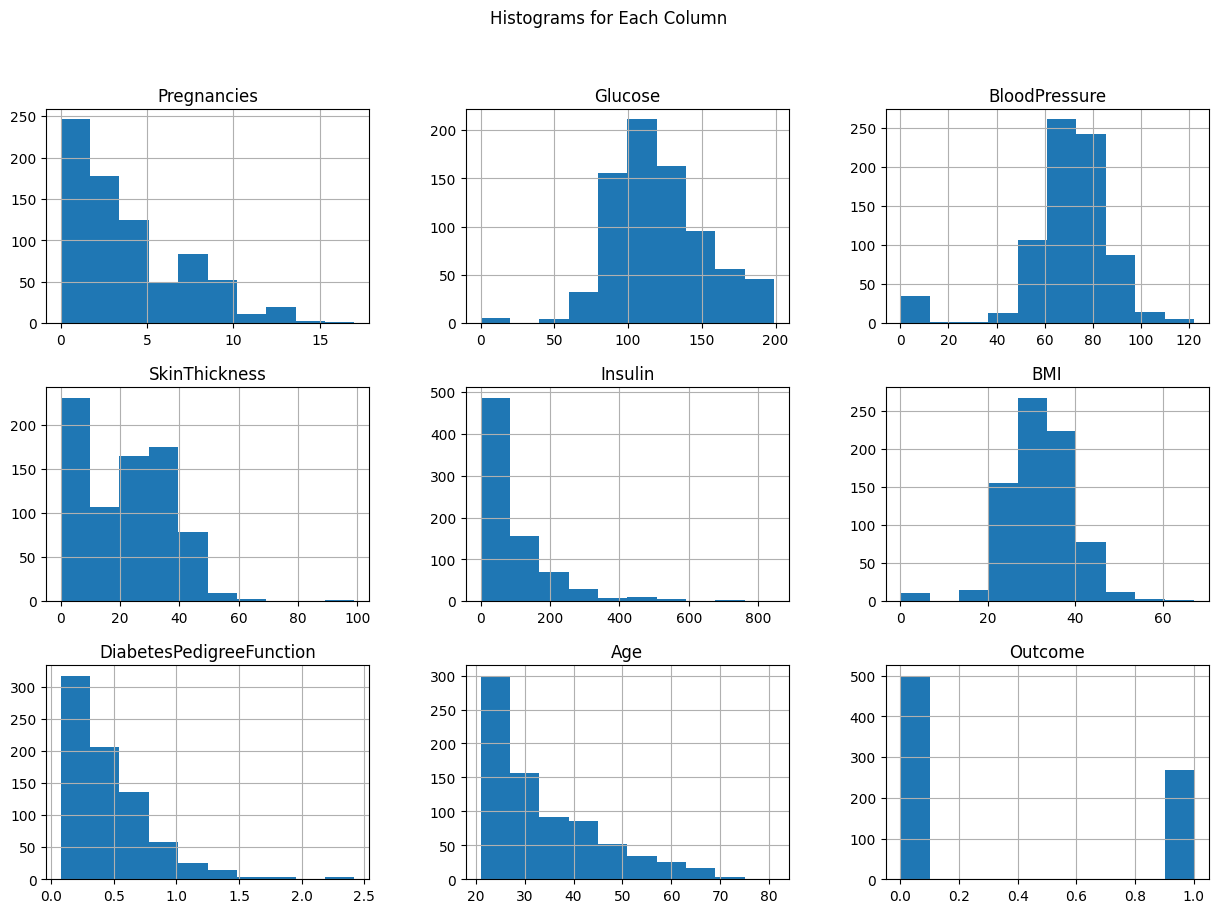

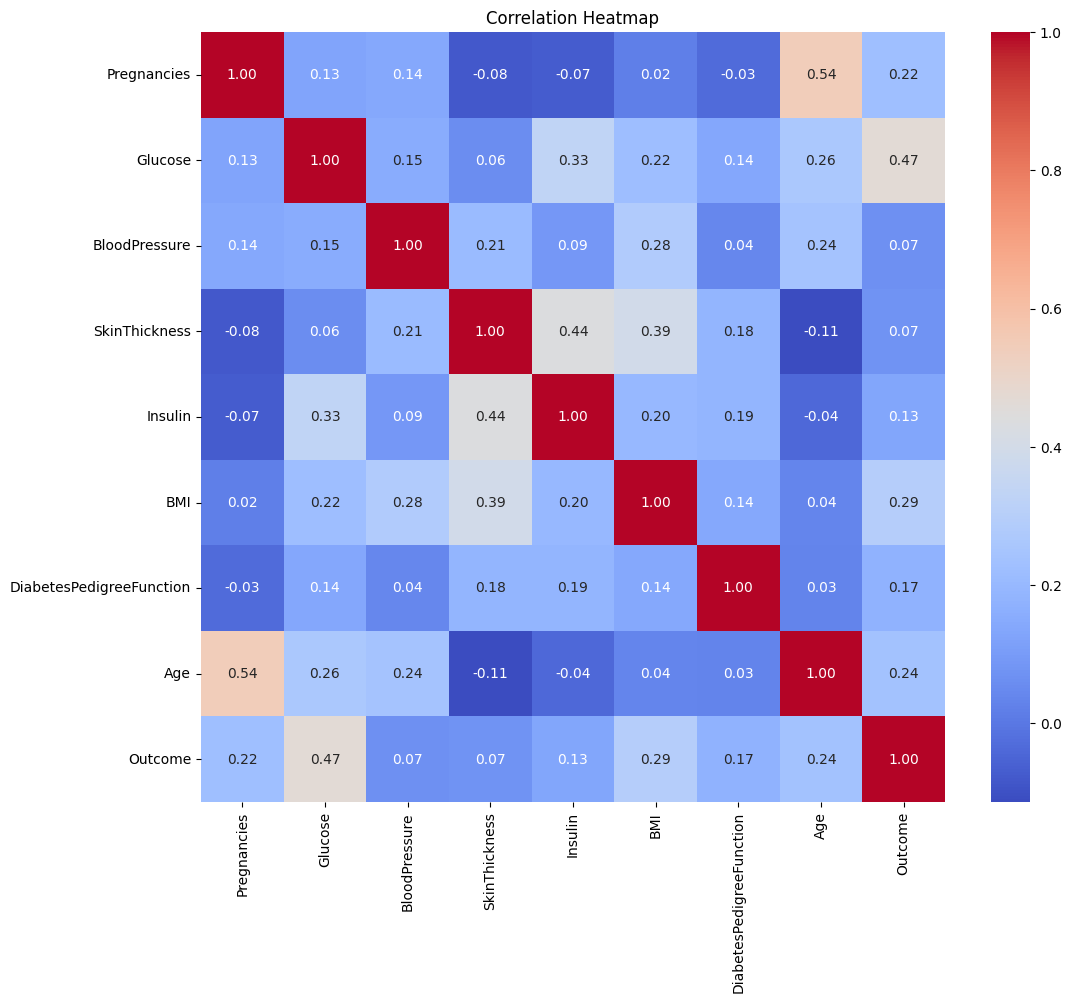

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provide the file path
file_path = r'C:\Users\Admin\Documents\MLAI\CSCN8010\LAB4F\Data\diabetes.csv'

# Read the dataset from the file
df = pd.read_csv(file_path)

# Displaying statistics
print(df.describe())

# Plotting histograms
df.hist(figsize=(15, 10))
plt.suptitle('Histograms for Each Column')
plt.show()

# Generating a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* 4.Clean the data if needed, and explain your reasoning for your reader (0.5 point)

In [12]:
import pandas as pd
import numpy as np  # Add this line for NumPy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

# Replace 'your_dataset.csv' with the actual file path or URL
file_path = r'C:\Users\Admin\Documents\MLAI\CSCN8010\LAB4F\Data\diabetes.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

# Check for missing values in each column
missing_values = df.isnull().sum()

# Check for missing values in the entire DataFrame
total_missing = df.isnull().sum().sum()

# b. Removing Duplicate Rows
df = df.drop_duplicates()

# c. Standardizing/Normalizing Data
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# d. Handling Outliers (Assuming numerical_columns already defined)
for column in numerical_columns:
    # Assuming a simple method to detect and handle outliers (you can customize based on your data)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# e. Correcting Inconsistent Data (Assuming 'column_to_correct' is the column to correct)
# Example: df['column_to_correct'] = df['column_to_correct'].str.upper()  # Convert to uppercase

# f. Encoding Categorical Variables (If applicable)
# Example: label_encoder = LabelEncoder()
#          df['categorical_column'] = label_encoder.fit_transform(df['categorical_column'])

# g. Addressing Skewed Distributions (Assuming numerical_columns already defined)
skewness = df[numerical_columns].apply(lambda x: skew(x))
skewed_columns = skewness[abs(skewness) > 0.5].index
df[skewed_columns] = df[skewed_columns].apply(lambda x: np.log1p(x))

# h. Checking Data Integrity (Assuming constraints are defined)
# Example: df = df[(df['date_column'] >= 'start_date') & (df['date_column'] <= 'end_date')]

# Print missing values and total missing values
missing_values = df.isnull().sum()
total_missing = df.isnull().sum().sum()
print("Missing values in each column:\n", missing_values)
print("\nTotal missing values in the DataFrame:", total_missing)



First few rows of the DataFrame:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Missing values in each column:
 Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction     39
Age          

c:\Users\Admin\Documents\MLAI\venv\CSCN8010_clascis_ml\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


5.Split the dataset to a train (70%), validation (15%) and test (15%) sets (0.5 point)

In [13]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your preprocessed DataFrame

# Split the data into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the dataset into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Train set shapes - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Validation set shapes - X: {}, y: {}".format(X_val.shape, y_val.shape))
print("Test set shapes - X: {}, y: {}".format(X_test.shape, y_test.shape))

Train set shapes - X: (537, 8), y: (537,)
Validation set shapes - X: (115, 8), y: (115,)
Test set shapes - X: (116, 8), y: (116,)


6.Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) (1 point)

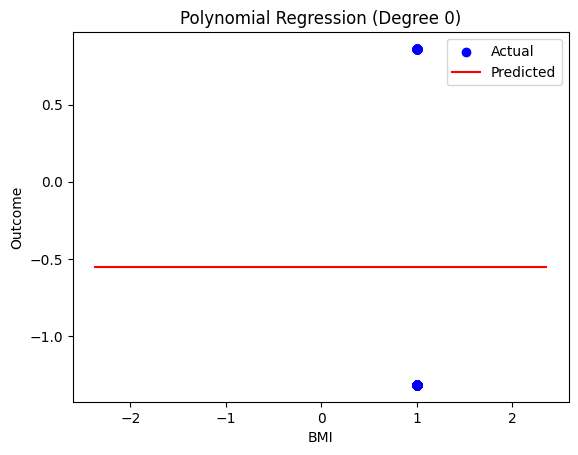

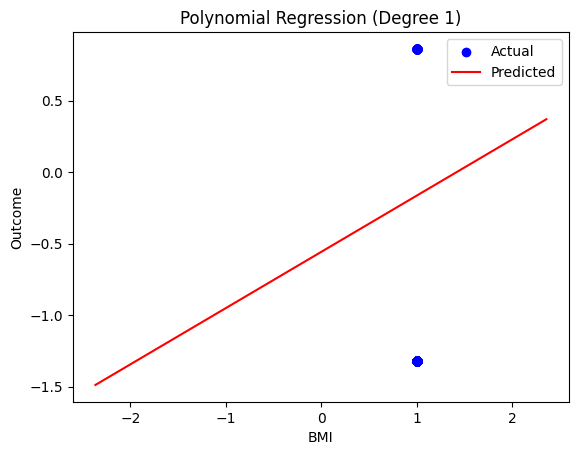

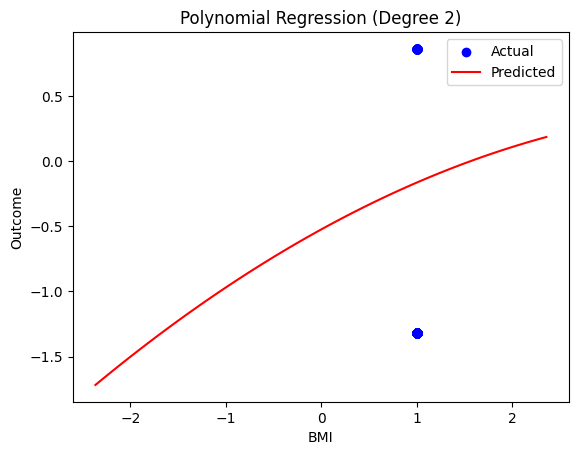

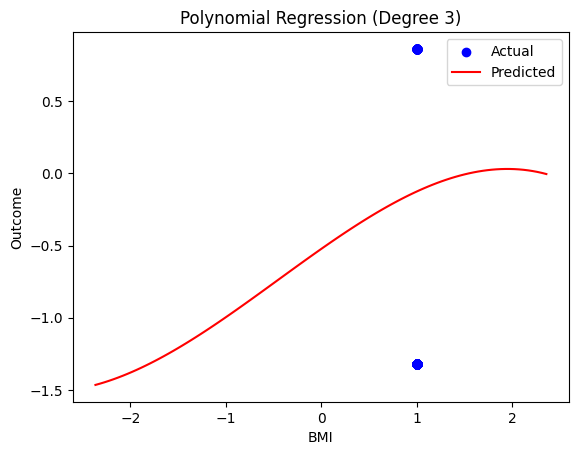

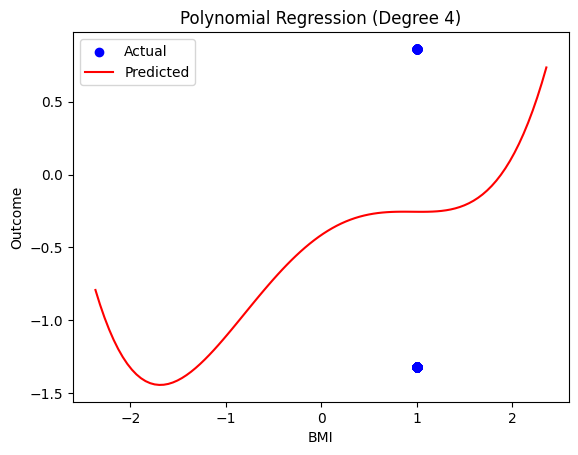

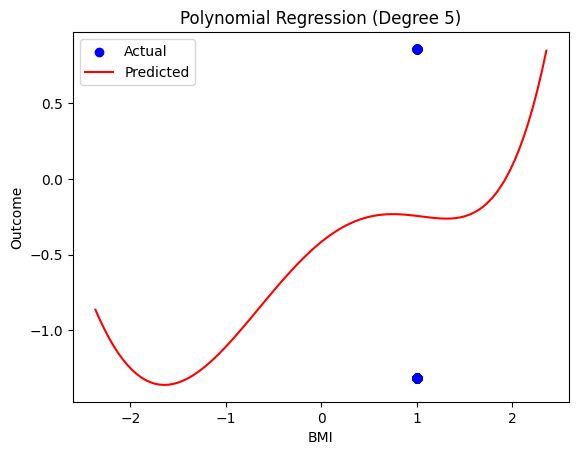

Degree 0: MSE = 1.0743234462396438
Degree 1: MSE = 1.0164150428517236
Degree 2: MSE = 1.0212775137788157
Degree 3: MSE = 1.0203763592067747
Degree 4: MSE = 1.0103101226193374
Degree 5: MSE = 1.0186897009033118


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed DataFrame
# Assuming 'BMI' is the feature and 'Outcome' is the target variable

# Extracting BMI and Outcome columns
X = df['BMI'].values.reshape(-1, 1)  # Feature
y = df['Outcome'].values  # Target variable

# Lists to store results
degrees = list(range(6))
mse_scores = []

# Loop through degrees and fit polynomial regression models
for degree in degrees:
    # Transforming the feature to polynomial of specified degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Creating and fitting a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Plotting the regression line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)

    plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
    plt.plot(x_range, y_range_pred, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('BMI')
    plt.ylabel('Outcome')
    plt.legend()
    plt.show()

# Displaying the MSE scores for each degree
for degree, mse in zip(degrees, mse_scores):
    print(f'Degree {degree}: MSE = {mse}')

* 7.Compare the six models using the training and validation data:
   * 1.Report R-squared, MAPE and MAE. You should have 6 values per model (1 point).

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Lists to store results
r2_scores = []
mape_scores = []
mae_scores = []

# Loop through degrees and fit polynomial regression models
for degree in degrees:
    # Transforming the feature to polynomial of specified degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Creating and fitting a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating R-squared
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculating MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_scores.append(mape)

    # Calculating MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

# Displaying the results for each degree
for degree, r2, mape, mae in zip(degrees, r2_scores, mape_scores, mae_scores):
    print(f'Degree {degree}: R-squared = {r2:.4f}, MAPE = {mape:.4f}, MAE = {mae:.4f}')

Degree 0: R-squared = -0.0001, MAPE = 0.9478, MAE = 0.9888
Degree 1: R-squared = 0.0538, MAPE = 0.8724, MAE = 0.9148
Degree 2: R-squared = 0.0493, MAPE = 0.8785, MAE = 0.9230
Degree 3: R-squared = 0.0502, MAPE = 0.8749, MAE = 0.9179
Degree 4: R-squared = 0.0595, MAPE = 0.8632, MAE = 0.9129
Degree 5: R-squared = 0.0517, MAPE = 0.8610, MAE = 0.9104


7.2.Conclusion: Choose the best model and explain your reasoning quantitively. Make it clear, and effective for a product manager to understand. This section includes the takeaway of the notebook.  
       * 1.Run the chosen model on the test set, and report R-Squared, MSE and MAE for it (0.5 point).
       * 2.Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them (0.5 point).
       * 3.Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value (0.5 point).

First few rows of the DataFrame:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Degree 0 - R-squared: -0.0001, MSE: 0.2264, MAE: 0.4539
Degree 1 - R-squared: 0.0350, MSE: 0.2185, MAE: 0.4299
Degree 2 - R-squared: 0.0433, MSE: 0.2166, MAE: 0.4249
Degree 3 - R-squared: 0.0552, MSE: 0.2139, MAE: 0.4190
Degree 4 - R-squared: 0.0570, MSE: 0.2135, MAE: 

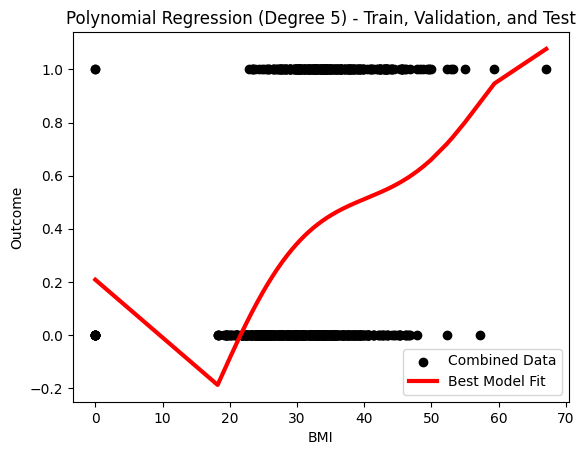

Equation of the Best Model: y = 0.00 + -0.22 * BMI
Manual Calculation for BMI 25.0: -0.04
Model Prediction for BMI 25.0: 0.16


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the actual file path or URL
file_path = r'C:\Users\Admin\Documents\MLAI\CSCN8010\LAB4F\Data\diabetes.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

# Assume 'BMI' is the feature and 'Outcome' is the target
X = df[['BMI']].values
y = df['Outcome'].values

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run polynomial regression on the BMI feature versus Outcome from degree 0 to 5
degrees = list(range(6))
r2_scores = []
mse_scores = []
mae_scores = []

for degree in degrees:
    # Transform the feature to polynomial of the current degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # Create and fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Make predictions on the validation set
    X_val_poly = poly.transform(X_test)
    y_pred = model.predict(X_val_poly)

    # Calculate R-squared, MSE, and MAE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Append scores to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

    # Print the scores for each degree
    print(f"Degree {degree} - R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

# Choose the best model based on R-squared
best_model_index = np.argmax(r2_scores)

# Retrieve the degree of the best model
best_degree = degrees[best_model_index]

# Print the degree of the best model
print(f"The best model is the one with degree {best_degree}.")

# Transform the feature to polynomial of the chosen degree
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Create and fit the chosen model
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Calculate R-squared, MSE, and MAE for the test set
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print(f"Test Set Performance of the Best Model:")
print(f"R-squared: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")

# Combine train, validation, and test sets for visualization
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

# Sort the combined data for plotting
sort_indices = X_combined[:, 1].argsort()
X_combined_sorted = X_combined[sort_indices]
y_combined_sorted = y_combined[sort_indices]

# Predictions on the combined data
y_pred_combined = best_model.predict(X_combined_sorted)

# Plot the graph
plt.scatter(X_combined_sorted[:, 1], y_combined_sorted, color='black', label='Combined Data')
plt.plot(X_combined_sorted[:, 1], y_pred_combined, color='red', linewidth=3, label='Best Model Fit')
plt.title(f'Polynomial Regression (Degree {best_degree}) - Train, Validation, and Test')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.legend()
plt.show()

# Coefficients of the best model
coefficients = best_model.coef_

# Display the equation of the best model
equation = f"y = {coefficients[0]:.2f} + {coefficients[1]:.2f} * BMI"
print(f"Equation of the Best Model: {equation}")

chosen_bmi = 25.0

# Transform the chosen BMI for manual prediction
chosen_bmi_transformed = poly.transform([[chosen_bmi]])

# Calculate the expected outcome manually
manual_prediction = np.dot(chosen_bmi_transformed, coefficients)

# Predict using the model
model_prediction = best_model.predict(chosen_bmi_transformed)[0]

# Compare the results
print(f"Manual Calculation for BMI {chosen_bmi}: {manual_prediction[0]:.2f}")
print(f"Model Prediction for BMI {chosen_bmi}: {model_prediction:.2f}")

3.How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function get_feature_names_out() (0.5 point)

First few rows of the DataFrame:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Degree 0 - R-squared: -0.0001, MSE: 0.2264, MAE: 0.4539
Trainable Parameters: 1
Degree 1 - R-squared: 0.0350, MSE: 0.2185, MAE: 0.4299
Trainable Parameters: 2
Degree 2 - R-squared: 0.0433, MSE: 0.2166, MAE: 0.4249
Trainable Parameters: 3
Degree 3 - R-squared: 0.0552, M

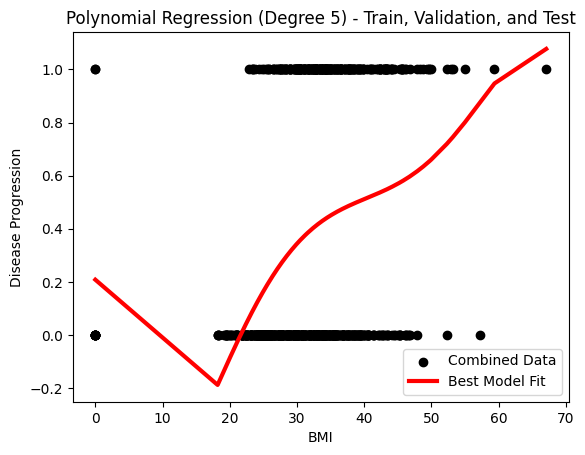

Equation of the Best Model: y = 0.00 + -0.22 * BMI
Manual Calculation for BMI 25.0: 0.16
Model Prediction for BMI 25.0: 0.16


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the actual file path or URL
file_path = r'C:\Users\Admin\Documents\MLAI\CSCN8010\LAB4F\Data\diabetes.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

# Assume 'BMI' is the feature and 'Outcome' is the target
X = df[['BMI']].values
y = df['Outcome'].values

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run polynomial regression on the BMI feature versus Disease Progression from degree 0 to 5
degrees = list(range(6))
r2_scores = []
mse_scores = []
mae_scores = []

for degree in degrees:
    # Transform the feature to polynomial of the current degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # Get the feature names to count trainable parameters
    feature_names = poly.get_feature_names_out(['BMI'])

    # Create a pipeline to include PolynomialFeatures and LinearRegression
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

    # Fit the model
    model.fit(X_train, y_train)

    # Count trainable parameters
    trainable_params = len(feature_names)

    # Make predictions on the validation set
    y_pred = model.predict(X_test)

    # Calculate R-squared, MSE, and MAE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Append scores to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

    # Print the scores for each degree
    print(f"Degree {degree} - R-squared: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")
    print(f"Trainable Parameters: {trainable_params}")

# Choose the best model based on R-squared
best_model_index = np.argmax(r2_scores)

# Retrieve the degree of the best model
best_degree = degrees[best_model_index]

# Print the degree of the best model
print(f"The best model is the one with degree {best_degree}.")

# Transform the feature to polynomial of the chosen degree
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Create and fit the chosen model
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Calculate R-squared, MSE, and MAE for the test set
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print(f"Test Set Performance of the Best Model:")
print(f"R-squared: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")

# Combine train, validation, and test sets for visualization
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

# Sort the combined data for plotting
sort_indices = X_combined[:, 1].argsort()
X_combined_sorted = X_combined[sort_indices]
y_combined_sorted = y_combined[sort_indices]

# Predictions on the combined data
y_pred_combined = best_model.predict(X_combined_sorted)

# Plot the graph
plt.scatter(X_combined_sorted[:, 1], y_combined_sorted, color='black', label='Combined Data')
plt.plot(X_combined_sorted[:, 1], y_pred_combined, color='red', linewidth=3, label='Best Model Fit')
plt.title(f'Polynomial Regression (Degree {best_degree}) - Train, Validation, and Test')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

# Coefficients of the best model
coefficients = best_model.coef_

# Display the equation of the best model
equation = f"y = {coefficients[0]:.2f} + {coefficients[1]:.2f} * BMI"
print(f"Equation of the Best Model: {equation}")

# Choose a BMI value for manual calculation
chosen_bmi = 25.0

# Transform the chosen BMI value using PolynomialFeatures
chosen_bmi_poly = poly.transform([[chosen_bmi]])

# Calculate the expected diabetes progression manually
manual_prediction = best_model.predict(chosen_bmi_poly)[0]

# Predict using the model
model_prediction = best_model.predict(poly.transform([[25.0]]))[0]

# Compare the results
print(f"Manual Calculation for BMI {chosen_bmi}: {manual_prediction:.2f}")
print(f"Model Prediction for BMI {chosen_bmi}: {model_prediction:.2f}")

###The End ~ TESSA-AYV